In [377]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [378]:
bb_usage_info = pd.read_csv("data/BB-Usage-Information.csv")

bb_usage_info.shape



(16790, 13)

In [379]:
bb_usage_info.head()

,Event_Source,Event_Source.hash,Upload,Download,Duration,year-month,RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,PSTN,PSTN.hash
0,VA2053035,6ff8125723953fdecaa253d2cb98b8fa,2479835042,17257396464,2505813,201910,R-VA,VA-NKM-NODE,MSAG5200-ISL,48196,1,0242053035,9231c080ea1108c7eeede0f449becb59
1,BG2286138,93ace21ebf00ad04343ff61293cec667,1864315334,8461159743,1326514,201910,R-RN,BG-NODE,MSAG5200,43139,1,0452286138,7e3969e2fb0fa148d817d3569b3eab3f
2,BZ2270133,2ada0ac0b4bafccb83447afd2e003804,413588193,4289102246,96033,201910,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,0552270133,f1415c386cab3355a5356c556fe9d0e1
3,IDH2073131,6c3134cf9691e170e9d1c011b0f19fdf,1012518853,14796542338,2681718,201910,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,0112073131,517b461d5b8e09f1c3547218cc2e4947
4,MT2050369,b7e298db3ba9498507c6c971b88ab990,926361088,20905123491,1666741,201910,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,0662050369,7fa3296ae71b6d2bb2ff46f97218940d


In [380]:
# ToDo 
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating Upload/Downlad/Duration - bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# User profile dim table
# visualize and analyze data

In [381]:
bb_usage_info = bb_usage_info.drop_duplicates(["Event_Source","year-month"], keep="last")

bb_usage_info.shape

(13008, 13)

In [382]:
bb_usage_info = bb_usage_info.drop(['Event_Source.hash','PSTN.hash'], axis=1)

In [383]:
bb_usage_info.head()

,Event_Source,Upload,Download,Duration,year-month,RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,PSTN
0,VA2053035,2479835042,17257396464,2505813,201910,R-VA,VA-NKM-NODE,MSAG5200-ISL,48196,1,0242053035
1,BG2286138,1864315334,8461159743,1326514,201910,R-RN,BG-NODE,MSAG5200,43139,1,0452286138
2,BZ2270133,413588193,4289102246,96033,201910,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,0552270133
3,IDH2073131,1012518853,14796542338,2681718,201910,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,0112073131
4,MT2050369,926361088,20905123491,1666741,201910,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,0662050369


In [384]:
bb_usage_info['Duration'].fillna(0)
bb_usage_info['Upload'].fillna(0)
bb_usage_info['Download'].fillna(0)

0         17257396464
1          8461159743
2          4289102246
3         14796542338
4         20905123491
             ...     
16785    169473000000
16786     14184721881
16787      8530589182
16788     27510692517
16789     26455546135
Name: Download, Length: 13008, dtype: int64

In [385]:
bb_usage_info.isnull().sum(axis=0)

Event_Source     0
Upload           0
Download         0
Duration         0
year-month       0
RTOM_CODE        0
LOCATION_CODE    0
MSAN             0
EQUP_ID          0
EQUP_INDEX       0
PSTN             0
dtype: int64

# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Upload/Download/Duration
- 3. Usage Rank
- 4. Labling usage

In [405]:
bb_usage = bb_usage_info[['Event_Source','Upload','Download','Duration','year-month']]
bb_usage['Usage'] = bb_usage.loc[:,['Upload','Download']].sum(axis=1)
bb_usage = bb_usage.drop(['Upload','Download'], axis=1)
bb_usage


<ipython-input-405-4e5d0bdf0181>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_usage['Usage'] = bb_usage.loc[:,['Upload','Download']].sum(axis=1)


,Event_Source,Duration,year-month,Usage
0,VA2053035,2505813,201910,19737231506
1,BG2286138,1326514,201910,10325475077
2,BZ2270133,96033,201910,4702690439
3,IDH2073131,2681718,201910,15809061191
4,MT2050369,1666741,201910,21831484579
...,...,...,...,...
16785,KI2911444,2650134,202005,193142941591
16786,IM2287049,631664,202008,15350849162
16787,MH2227363,353262,202005,9149102282
16788,MT2050369,1661209,202005,28965125515


In [406]:
pivot_bb_usage_info = pd.pivot_table(bb_usage,index=['Event_Source'],columns=['year-month'], aggfunc=np.sum, fill_value=0)
pivot_bb_usage_info

Duration                                                        \
year-month     201908   201910   201911   201912   202001   202002   202003   
Event_Source                                                                  
AD2050144     1600979        0        0        0        0        0        0   
AD2050456       15138    43482    36344    22474    22020    24218    14168   
AD2055583       61987        0        0        0        0        0        0   
AD2057596     1693210  1765997  2318726  2187322  2241103  2053238  2445421   
AD2234019       39180    31783    41957    50723    65135   138008   119451   
...               ...      ...      ...      ...      ...      ...      ...   
WY2246088           0  1695577  2190987  2271138  2339542  2277366  1939814   
WY2246276      800923   974958  1364680  1448847  1566425  1466169  1600766   
WY2246709     2321808  2627620  2557554  2642203  2695283  2457631  2641766   
WY2257144           0        0        0        0        0        0        0   
WY2257510           0    36000  1443665        0        0        0        0   

                                         ...        Usage               \
year-month     202004   202005   202006  ...       201911       201912   
Event_Source                             ...                             
AD2050144           0        0        0  ...            0            0   
AD2050456       34363   116905    80805  ...   7600157736    385760746   
AD2055583           0        0        0  ...            0            0   
AD2057596     2309697  2426687  2523800  ...  47563580832  51783436164   
AD2234019      140620   161957   107223  ...   4560385120   6414847442   
...               ...      ...      ...  ...          ...          ...   
WY2246088     2045461   376978        0  ...  16698391271  13267528903   
WY2246276     1022741   366556  1102533  ...   7560128515  10797086822   
WY2246709     2307728  1931885  2567038  ...  27529429171  25971990764   
WY2257144           0        0    65237  ...            0            0   
WY2257510           0   656490   986380  ...   5958160352            0   

                                                                               \
year-month         202001       202002       202003       202004       202005   
Event_Source                                                                    
AD2050144               0            0            0            0            0   
AD2050456       333077871    655216688    503675686    571568762   1690010709   
AD2055583               0            0            0            0            0   
AD2057596     65776625186  35214918272  73220630477  76163050525  67118215270   
AD2234019      4525395831   6907549015   5902026626   8367031978   5766858429   
...                   ...          ...          ...          ...          ...   
WY2246088     16863438404  14776610245  14432359887  17054501850      6471508   
WY2246276      9227537934  10227416525  13023603857   9222121122   4754792539   
WY2246709     52491792751  54603122680  38675506694  35403020777  12209946879   
WY2257144               0            0            0            0            0   
WY2257510               0            0            0            0   3493083554   

                                                     
year-month         202006       202007       202008  
Event_Source                                         
AD2050144               0            0            0  
AD2050456      1321795629   1342010987   1800479901  
AD2055583               0            0            0  
AD2057596     65354578391    438497363            0  
AD2234019      2916221587   6140781297   6390744329  
...                   ...          ...          ...  
WY2246088               0            0            0  
WY2246276      8296680106   8126797198   8022755156  
WY2246709     31442135422  40295299045  36471238659  
WY2257144      2531750107  30519819665  28809792278  
WY2257510      6841284485  14373

In [407]:
pivot_bb_usage_info.columns

MultiIndex([('Duration', 201908),
            ('Duration', 201910),
            ('Duration', 201911),
            ('Duration', 201912),
            ('Duration', 202001),
            ('Duration', 202002),
            ('Duration', 202003),
            ('Duration', 202004),
            ('Duration', 202005),
            ('Duration', 202006),
            ('Duration', 202007),
            ('Duration', 202008),
            (   'Usage', 201908),
            (   'Usage', 201910),
            (   'Usage', 201911),
            (   'Usage', 201912),
            (   'Usage', 202001),
            (   'Usage', 202002),
            (   'Usage', 202003),
            (   'Usage', 202004),
            (   'Usage', 202005),
            (   'Usage', 202006),
            (   'Usage', 202007),
            (   'Usage', 202008)],
           names=[None, 'year-month'])

In [408]:
pivot_bb_usage_info.describe().apply(lambda s: s.apply('{0:.5f}'.format))

Duration                                               \
year-month         201908         201910         201911         201912   
count          1304.00000     1304.00000     1304.00000     1304.00000   
mean        1012286.17715  1181154.61580  1169814.79985  1246084.24387   
std          891841.40922   976348.19712   937122.09244   989704.66075   
min               0.00000        0.00000        0.00000        0.00000   
25%           23858.75000   185188.00000   217618.00000   245615.00000   
50%          838676.50000   982260.00000  1054492.50000  1117748.50000   
75%         1927485.75000  2199990.25000  2133140.50000  2307769.75000   
max         2399096.00000  2709612.00000  2611013.00000  2704188.00000   

                                                                        \
year-month         202001         202002         202003         202004   
count          1304.00000     1304.00000     1304.00000     1304.00000   
mean        1300060.72623  1204333.23620  1328410.18328  1310042.77914   
std         1002744.77159   939917.51386  1025691.09093  1009905.57683   
min               0.00000        0.00000        0.00000        0.00000   
25%          323968.00000   311585.00000   267302.50000   163808.50000   
50%         1188035.00000  1038617.50000  1310187.00000  1421247.00000   
75%         2422360.00000  2298841.50000  2484480.00000  2415633.50000   
max         2700569.00000  2547134.00000  2707636.00000  2617997.00000   

                                          ...               Usage  \
year-month         202005         202006  ...              201911   
count          1304.00000     1304.00000  ...          1304.00000   
mean        1318663.88344  1318890.17101  ...   15347331834.86963   
std          994685.51291   955127.87396  ...   22084777457.28041   
min               0.00000        0.00000  ...             0.00000   
25%          335673.50000   419826.00000  ...    1001864281.00000   
50%         1335382.50000  1293964.00000  ...    8791259770.50000   
75%         2388404.75000  2387138.00000  ...   19030800825.00000   
max         2706133.00000  2617663.00000  ...  248069692092.00000   

                                                                        \
year-month              201912              202001              202002   
count               1304.00000          1304.00000          1304.00000   
mean         16814938974.75153   18137212323.34893   18447983757.70475   
std          24295140807.19868   27071370350.49538   26071758281.44104   
min                    0.00000             0.00000             0.00000   
25%           1753340851.75000    1697985386.00000    1399701174.50000   
50%           9350540170.00000   10531959857.00000   10661782460.00000   
75%          20988655385.50000   22324064679.25000   23728353527.50000   
max         306844588829.00000  295202515386.00000  249786289622.00000   

                                                                        \
year-month              202003              202004              202005   
count               1304.00000          1304.00000          1304.00000   
mean         19641720056.75843   22194612362.40261   21763580960.72623   
std          29101282258.75366   34775756519.28039   30500573293.31493   
min                    0.00000             0.00000             0.00000   
25%           1477374267.50000     370786988.00000    2175744770.75000   
50%          11092642234.50000   12218473490.00000   12132835736.50000   
75%          22976923254.50000   27243962411.50000   26743089286.00000   
max         319723242963.00000  537118249202.00000  294386798487.00000   

                                                                        
year-month              202006              202007              202008  
count               1304.00000          1304.00000          1304.00000  
mean         21028471409.05521   21586447184.94249   21339454998.94632  
std          27629704268.11407   27909872902.10666   27017284038.85247

In [409]:
bb_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Duration,year-month,Usage
count,13008.00000,13008.00000,13008.00000
mean,1521162.16974,201974.08579,22698773423.90152
std,870510.17732,44.13971,28495951112.13368
min,120.00000,201908.00000,0.00000
25%,740346.50000,201912.00000,6856001510.25000
50%,1518065.00000,202003.00000,13823453785.50000
75%,2426745.75000,202006.00000,27475346683.75000
max,2709612.00000,202008.00000,537118249202.00000


In [410]:
# binning usage
usage_bins = [0, 7057561283.25, 14188526279.5,28226707481.75, 537118249202.0]
for col in pivot_bb_usage_info['Usage'].columns:
    pivot_bb_usage_info['Usage'][col] = np.searchsorted(usage_bins, pivot_bb_usage_info['Usage'][col].values)
pivot_bb_usage_info['Usage']

<ipython-input-410-11a9924446b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_bb_usage_info['Usage'][col] = np.searchsorted(usage_bins, pivot_bb_usage_info['Usage'][col].values)


year-month,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
Event_Source,,,,,,,,,,,,
AD2050144,4,0,0,0,0,0,0,0,0,0,0,0
AD2050456,1,1,2,1,1,1,1,1,1,1,1,1
AD2055583,1,0,0,0,0,0,0,0,0,0,0,0
AD2057596,4,4,4,4,4,4,4,4,4,4,1,0
AD2234019,1,1,1,1,1,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
WY2246088,0,2,3,2,3,3,3,3,1,0,0,0
WY2246276,1,2,2,2,2,2,2,2,1,2,2,2
WY2246709,3,3,3,3,4,4,4,4,2,4,4,4


In [411]:
# binning duration
duration_bins = [0, 745381.25, 1522064.0, 2438034.0,2709612.0]
for col in pivot_bb_usage_info['Duration'].columns:
    pivot_bb_usage_info['Duration'][col] = np.searchsorted(duration_bins, pivot_bb_usage_info['Duration'][col].values)
pivot_bb_usage_info['Duration']

<ipython-input-411-e9ec739a43e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_bb_usage_info['Duration'][col] = np.searchsorted(duration_bins, pivot_bb_usage_info['Duration'][col].values)


year-month,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
Event_Source,,,,,,,,,,,,
AD2050144,3,0,0,0,0,0,0,0,0,0,0,0
AD2050456,1,1,1,1,1,1,1,1,1,1,1,1
AD2055583,1,0,0,0,0,0,0,0,0,0,0,0
AD2057596,3,3,3,3,3,3,4,3,3,4,1,0
AD2234019,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
WY2246088,0,3,3,3,3,3,3,3,1,0,0,0
WY2246276,2,2,2,2,3,2,3,2,1,2,2,2
WY2246709,3,4,4,4,4,4,4,3,3,4,4,4


In [412]:
pivot_bb_usage_info

Duration                                                          \
year-month     201908 201910 201911 201912 202001 202002 202003 202004 202005   
Event_Source                                                                    
AD2050144           3      0      0      0      0      0      0      0      0   
AD2050456           1      1      1      1      1      1      1      1      1   
AD2055583           1      0      0      0      0      0      0      0      0   
AD2057596           3      3      3      3      3      3      4      3      3   
AD2234019           1      1      1      1      1      1      1      1      1   
...               ...    ...    ...    ...    ...    ...    ...    ...    ...   
WY2246088           0      3      3      3      3      3      3      3      1   
WY2246276           2      2      2      2      3      2      3      2      1   
WY2246709           3      4      4      4      4      4      4      3      3   
WY2257144           0      0      0      0      0      0      0      0      0   
WY2257510           0      1      2      0      0      0      0      0      1   

                     ...  Usage                                            \
year-month   202006  ... 201911 201912 202001 202002 202003 202004 202005   
Event_Source         ...                                                    
AD2050144         0  ...      0      0      0      0      0      0      0   
AD2050456         1  ...      2      1      1      1      1      1      1   
AD2055583         0  ...      0      0      0      0      0      0      0   
AD2057596         4  ...      4      4      4      4      4      4      4   
AD2234019         1  ...      1      1      1      1      1      2      1   
...             ...  ...    ...    ...    ...    ...    ...    ...    ...   
WY2246088         0  ...      3      2      3      3      3      3      1   
WY2246276         2  ...      2      2      2      2      2      2      1   
WY2246709         4  ...      3      3      4      4      4      4      2   
WY2257144         1  ...      0      0      0      0      0      0      0   
WY2257510         2  ...      1      0      0      0      0      0      1   

                                   
year-month   202006 202007 202008  
Event_Source                       
AD2050144         0      0      0  
AD2050456         1      1      1  
AD2055583         0      0      0  
AD2057596         4      1      0  
AD2234019         1      1      1  
...             ...    ...    ...  
WY2246088         0      0      0  
WY2246276         2      2      2  
WY2246709         4      4      4  
WY2257144         1      4      4  
WY2257510         1      3      2  

[1304 rows x 24 columns]

In [413]:
year_month_list = pivot_bb_usage_info['Usage'].columns

In [414]:
# multplying bins to get usage rating
for col in year_month_list:
    pivot_bb_usage_info[col] = pivot_bb_usage_info['Usage'][col]  * pivot_bb_usage_info['Duration'][col]

### Usage ratings for year-month

In [415]:
pivot_bb_usage_info = pivot_bb_usage_info.drop(['Usage','Duration'], axis=1)
pivot_bb_usage_info

,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
year-month,,,,,,,,,,,,
Event_Source,,,,,,,,,,,,
AD2050144,12,0,0,0,0,0,0,0,0,0,0,0
AD2050456,1,1,2,1,1,1,1,1,1,1,1,1
AD2055583,1,0,0,0,0,0,0,0,0,0,0,0
AD2057596,12,12,12,12,12,12,16,12,12,16,1,0
AD2234019,1,1,1,1,1,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
WY2246088,0,6,9,6,9,9,9,9,1,0,0,0
WY2246276,2,4,4,4,6,4,6,4,1,4,4,4


In [416]:
# scaling usage rating
scaler = MinMaxScaler()
for col in year_month_list:
    pivot_bb_usage_info[col] = scaler.fit_transform(pivot_bb_usage_info[col].values.reshape(-1,1))
pivot_bb_usage_info

,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
year-month,,,,,,,,,,,,
Event_Source,,,,,,,,,,,,
AD2050144,1.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
AD2050456,0.083333,0.0625,0.1250,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625
AD2055583,0.083333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
AD2057596,1.000000,0.7500,0.7500,0.7500,0.7500,0.7500,1.0000,0.7500,0.7500,1.0000,0.0625,0.0000
AD2234019,0.083333,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.1250,0.0625,0.0625,0.0625,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...
WY2246088,0.000000,0.3750,0.5625,0.3750,0.5625,0.5625,0.5625,0.5625,0.0625,0.0000,0.0000,0.0000
WY2246276,0.166667,0.2500,0.2500,0.2500,0.3750,0.2500,0.3750,0.2500,0.0625,0.2500,0.2500,0.2500


<AxesSubplot:xlabel='None-year-month', ylabel='Event_Source'>

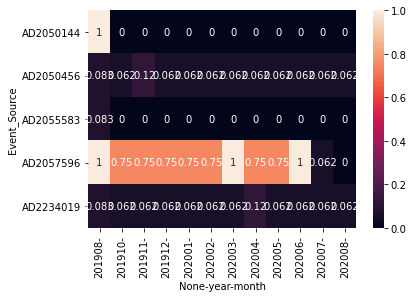

In [417]:
sns.heatmap(pivot_bb_usage_info[year_month_list].head(), annot=True)

In [418]:
pivot_bb_usage_info['Usage_Rating_Scaled'] = pivot_bb_usage_info[year_month_list].sum(axis=1)/len(year_month_list)
pivot_bb_usage_info

,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
year-month,,,,,,,,,,,,,
Event_Source,,,,,,,,,,,,,
AD2050144,1.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.083333
AD2050456,0.083333,0.0625,0.1250,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.069444
AD2055583,0.083333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.006944
AD2057596,1.000000,0.7500,0.7500,0.7500,0.7500,0.7500,1.0000,0.7500,0.7500,1.0000,0.0625,0.0000,0.692708
AD2234019,0.083333,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.1250,0.0625,0.0625,0.0625,0.0625,0.069444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY2246088,0.000000,0.3750,0.5625,0.3750,0.5625,0.5625,0.5625,0.5625,0.0625,0.0000,0.0000,0.0000,0.302083
WY2246276,0.166667,0.2500,0.2500,0.2500,0.3750,0.2500,0.3750,0.2500,0.0625,0.2500,0.2500,0.2500,0.248264


In [419]:
pivot_bb_usage_info.describe()

,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
year-month,,,,,,,,,,,,,
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000
mean,0.328668,0.310966,0.299942,0.327406,0.346578,0.322997,0.363449,0.375144,0.374185,0.375959,0.390098,0.391727,0.350593
std,0.323061,0.296047,0.281631,0.302784,0.315271,0.291161,0.323647,0.328440,0.320923,0.315026,0.317194,0.314921,0.262920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005208
25%,0.083333,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.125000,0.125000,0.125000,0.126736
50%,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.375000,0.280382
75%,0.500000,0.500000,0.500000,0.500000,0.562500,0.515625,0.562500,0.750000,0.562500,0.562500,0.562500,0.750000,0.531250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [400]:
#pivot_bb_usage_info['Usage_Rating_Scaled'] = scaler.fit_transform(pivot_bb_usage_info['Usage_Rating_Scaled'].values.reshape(-1,1))

In [420]:
# labling usage bins
bins = [0, 0.3, 0.55,1]
labels = ['LOW','MEDIUM','HIGH']
pivot_bb_usage_info['Usage_Rating_Categorical'] = pd.cut(pivot_bb_usage_info['Usage_Rating_Scaled'], bins=bins, labels=labels)
pivot_bb_usage_info

,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
year-month,,,,,,,,,,,,,,
Event_Source,,,,,,,,,,,,,,
AD2050144,1.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.083333,LOW
AD2050456,0.083333,0.0625,0.1250,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.069444,LOW
AD2055583,0.083333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.006944,LOW
AD2057596,1.000000,0.7500,0.7500,0.7500,0.7500,0.7500,1.0000,0.7500,0.7500,1.0000,0.0625,0.0000,0.692708,HIGH
AD2234019,0.083333,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.1250,0.0625,0.0625,0.0625,0.0625,0.069444,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY2246088,0.000000,0.3750,0.5625,0.3750,0.5625,0.5625,0.5625,0.5625,0.0625,0.0000,0.0000,0.0000,0.302083,MEDIUM
WY2246276,0.166667,0.2500,0.2500,0.2500,0.3750,0.2500,0.3750,0.2500,0.0625,0.2500,0.2500,0.2500,0.248264,LOW


In [421]:
# adding category "NO" 
pivot_bb_usage_info['Usage_Rating_Categorical'] = pivot_bb_usage_info['Usage_Rating_Categorical'].cat.add_categories("NO")
pivot_bb_usage_info.loc[pivot_bb_usage_info['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"


In [422]:
pivot_bb_usage_info[(pivot_bb_usage_info['Usage_Rating_Scaled'] == 0.0)]

,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
year-month,,,,,,,,,,,,,,
Event_Source,,,,,,,,,,,,,,


### Fina Result: Usage Ratings

In [423]:
pivot_bb_usage_info

,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
year-month,,,,,,,,,,,,,,
Event_Source,,,,,,,,,,,,,,
AD2050144,1.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.083333,LOW
AD2050456,0.083333,0.0625,0.1250,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.069444,LOW
AD2055583,0.083333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.006944,LOW
AD2057596,1.000000,0.7500,0.7500,0.7500,0.7500,0.7500,1.0000,0.7500,0.7500,1.0000,0.0625,0.0000,0.692708,HIGH
AD2234019,0.083333,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.1250,0.0625,0.0625,0.0625,0.0625,0.069444,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY2246088,0.000000,0.3750,0.5625,0.3750,0.5625,0.5625,0.5625,0.5625,0.0625,0.0000,0.0000,0.0000,0.302083,MEDIUM
WY2246276,0.166667,0.2500,0.2500,0.2500,0.3750,0.2500,0.3750,0.2500,0.0625,0.2500,0.2500,0.2500,0.248264,LOW


# Phase 2

## Binnig by Location 

- 1. group by location columns
- 2. Bin by location and get counts

In [373]:
# bucketing by location
bb_location_info = bb_usage_info
bb_location_info['Location_Identifier'] = bb_location_info['MSAN'].astype(str)+ bb_location_info['LOCATION_CODE'].astype(str) +bb_location_info['EQUP_ID'].astype(str) +bb_location_info['EQUP_INDEX'].astype(str)
bb_location_info

,Event_Source,Upload,Download,Duration,year-month,RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,PSTN,Location_Identifier
0,VA2053035,2479835042,17257396464,2505813,201910,R-VA,VA-NKM-NODE,MSAG5200-ISL,48196,1,0242053035,MSAG5200-ISLVA-NKM-NODE481961
1,BG2286138,1864315334,8461159743,1326514,201910,R-RN,BG-NODE,MSAG5200,43139,1,0452286138,MSAG5200BG-NODE431391
2,BZ2270133,413588193,4289102246,96033,201910,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,0552270133,MSAG5200-ISLBZ-NODE435881
3,IDH2073131,1012518853,14796542338,2681718,201910,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,0112073131,MSAG5200-ISLIDH-KGW-NODE6194491
4,MT2050369,926361088,20905123491,1666741,201910,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,0662050369,MSAG5200-ISLMT-AVR-NODE467161
...,...,...,...,...,...,...,...,...,...,...,...,...
16785,KI2911444,23669941591,169473000000,2650134,202005,R-KI,KI-NODE,C300M,1066816,4,0112911444,C300MKI-NODE10668164
16786,IM2287049,1166127281,14184721881,631664,202008,R-GL,IM-NODE,UA5000(IPMB),39153,1,0912287049,UA5000(IPMB)IM-NODE391531
16787,MH2227363,618513100,8530589182,353262,202005,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1,0412227363,MSAG5200-ISLMH-POL-NODE491451
16788,MT2050369,1454432998,27510692517,1661209,202005,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,0662050369,MSAG5200-ISLMT-AVR-NODE467161


In [374]:
bb_location_info = bb_location_info.drop_duplicates("Event_Source", keep="last")
bb_location_info.shape

(1304, 12)

In [375]:
bb_location_info["User_Count"] = 1
bb_gropued_by_locations = bb_location_info.groupby(['Location_Identifier'], axis=0,as_index=False).sum()
bb_gropued_by_locations = bb_gropued_by_locations[['Location_Identifier','User_Count']]

<ipython-input-375-28461a8251ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_location_info["User_Count"] = 1


In [376]:
bb_gropued_by_locations

,Location_Identifier,User_Count
0,C300MHE-DMD-NODE15221561,3
1,C300MHT-NE-NODE8152461,10
2,C300MIDH-IDJ-NODE11065541,23
3,C300MKI-NODE10668164,25
4,C300MNW-MEE-NODE18887751,73
5,C300MPDT-NODE13379431,3
6,C300MTP-NODE8700911,9
7,C300MVH-NODE9874041,3
8,MA5603TAD-SRV-NODE10224991,2
9,MSAG5200-ISLBZ-NODE435881,44
